In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
abnormal = pd.read_csv('/home/dang032003/mlmed2024/ECG/ptbdb_abnormal.csv', header=None)
normal = pd.read_csv('/home/dang032003/mlmed2024/ECG/ptbdb_normal.csv', header=None)
test = pd.read_csv('/home/dang032003/mlmed2024/ECG/mitbih_test.csv', header=None)
train = pd.read_csv('/home/dang032003/mlmed2024/ECG/mitbih_train.csv', header=None)

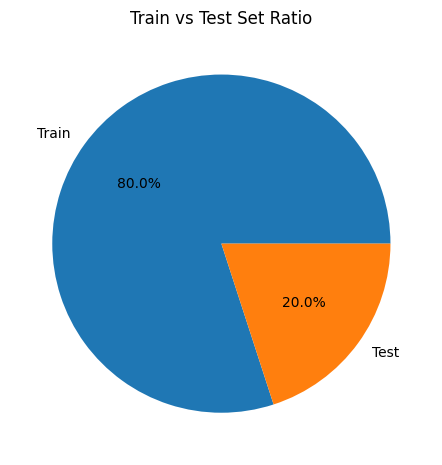

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie([len(train), len(test)], labels=['Train', 'Test'], autopct='%1.1f%%')
plt.title("Train vs Test Set Ratio")
plt.show()

Text(0.5, 1.0, 'test')

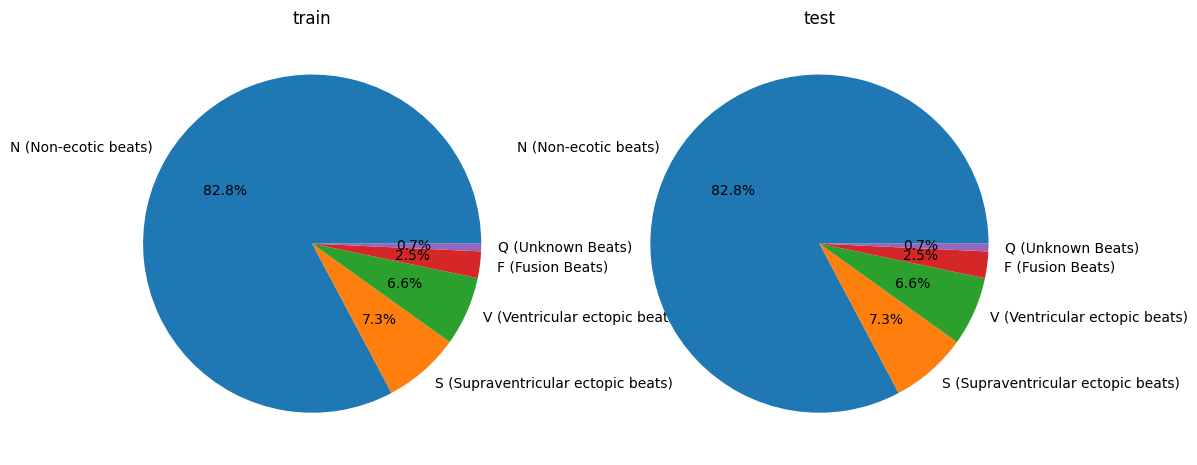

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(train[187].value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("train")

plt.subplot(1,2,2)
plt.pie(test[187].value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("test")

In [5]:
train_target=train[187]
test_target=test[187]
train=train.drop(187,axis=1)
test=test.drop(187,axis=1)

In [6]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, train_target_resampled = ros.fit_resample(train, train_target)
train_resampled = pd.DataFrame(X_resampled, columns=train.columns)

X_resampled, test_target_resampled = ros.fit_resample(test, test_target)
test_resampled = pd.DataFrame(X_resampled, columns=test.columns)

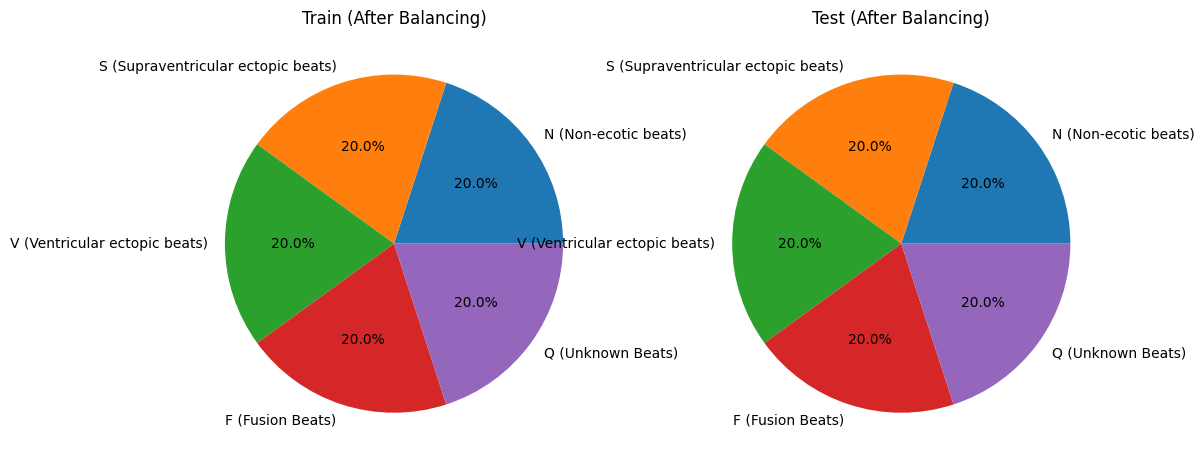

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(train_target_resampled.value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("Train (After Balancing)")

plt.subplot(1,2,2)
plt.pie(test_target_resampled.value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("Test (After Balancing)")
plt.show()

In [8]:
n_estimators_values = [10, 20, 50]

best_accuracy = 0
best_n_estimators = 0

for n_estimators in n_estimators_values:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(train_resampled, train_target_resampled)
    accuracy = model.score(test_resampled, test_target_resampled)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best n_estimators:", best_n_estimators)
print("Best accuracy:", best_accuracy)


Best n_estimators: 20
Best accuracy: 0.8264046804283034


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(test_target_resampled, predictions, average='weighted')
recall = recall_score(test_target_resampled, predictions, average='weighted')
f1 = f1_score(test_target_resampled, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8887830160885484
Recall: 0.8251462633844795
F1 Score: 0.8300223269931336
